 The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df= pd.read_csv("creditcard.csv", sep= ',')

In [430]:
df1= pd.read_csv("creditcard.csv", sep= ',')

In [301]:
df1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [299]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,0.927124,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,3.495006,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-0.307413,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-0.229162,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.770838,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,358.683155,1.000000


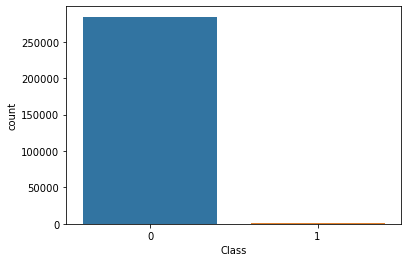

In [4]:
sns.countplot(df['Class'])
plt.show()

seeems like the data is imbalanced so we need imbalanced learn package

In [5]:
from imblearn.over_sampling import SMOTE


In [6]:
#let's do some EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


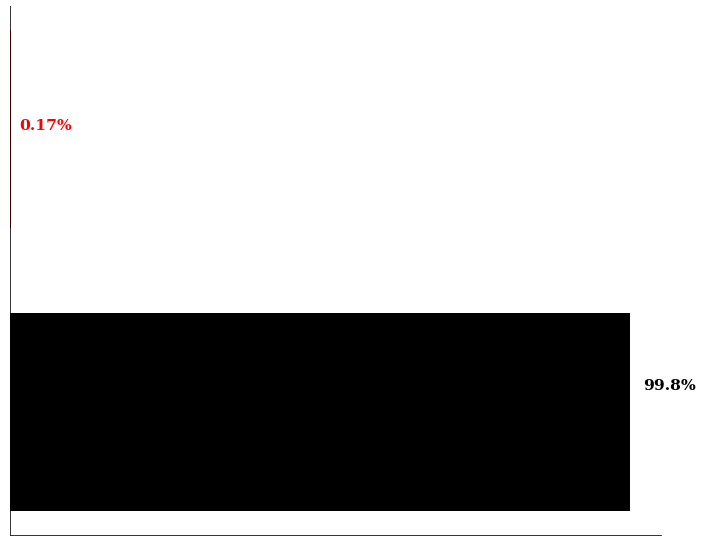

In [9]:
#let's visualize classes
d1= pd.DataFrame(df.groupby(['Class'])['Class'].count())
fig,axes=plt.subplots(figsize= (12,10), dpi= 70)
axes.barh([0],d1.Class[0], height= 0.7, color= 'black')
plt.text(290000,0.08, '99.8%',{'fontname':'Serif','weight':'bold' ,'size':'16','color':'black'})
axes.barh([1], d1.Class[1] ,height= 0.7, color= 'red')
plt.text(3900,1, '0.17%',{'fontname':'Serif', 'weight':'bold','size':'16','color':'red'})

axes.axes.get_xaxis().set_visible(False)
axes.axes.get_yaxis().set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
plt.show()


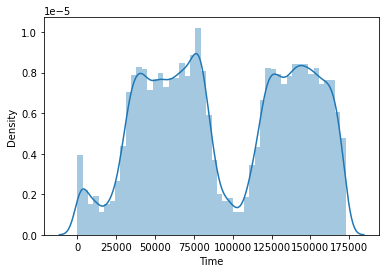

In [10]:
#let's do it without sampling and with oversampling
sns.distplot(df['Time'])
plt.show()

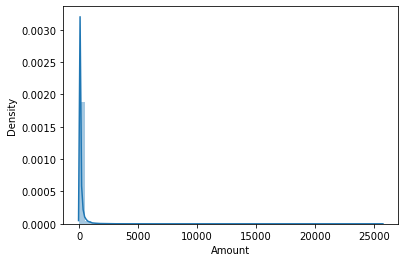

In [11]:
sns.distplot(df['Amount'])
plt.show()

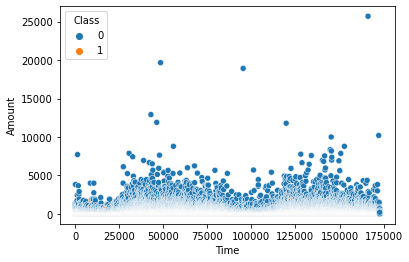

In [12]:
sns.scatterplot(x= 'Time', y='Amount', hue= 'Class', data = df)

plt.show()

<AxesSubplot:xlabel='Class', ylabel='Amount'>

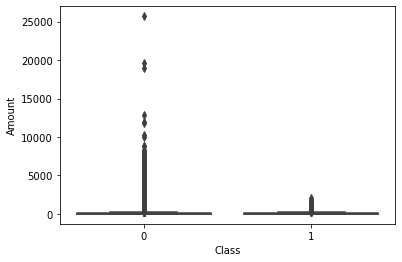

In [13]:
sns.boxplot(x=df['Class'], y=df['Amount'])

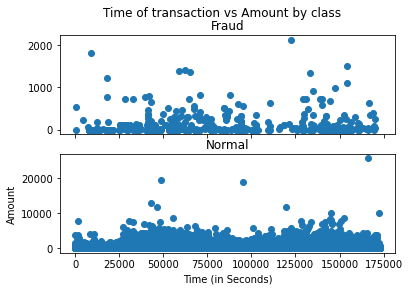

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(df[df.Class==1].Time, df[df.Class==1].Amount)
ax1.set_title('Fraud')

ax2.scatter(df[df.Class == 0].Time, df[df.Class == 0].Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

looks like there are outliers  time really do not play role so remove it 

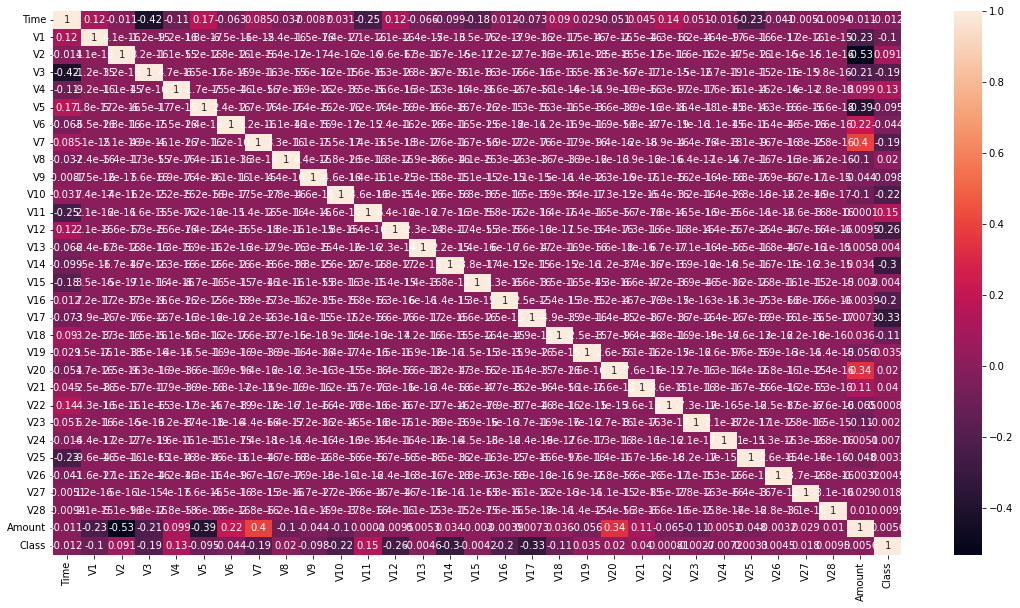

In [15]:
#let's checl correrlation now
plt.figure(figsize= (19,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [16]:
#becuasue of outliers let;s scale it
from sklearn.preprocessing import RobustScaler

rbst= RobustScaler()



In [17]:
df['Amount']= rbst.fit_transform(df['Amount'].values.reshape(-1,1))


In [307]:
Y_df1= df1['Class']

In [308]:
df1= rbst.fit_transform(df1.values)

In [18]:
target = 'Class'
predictors = [ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

### splitting training and testing set

In [19]:
X= df.drop(['Class','Time'], axis =1)
Y= df.Class.values

In [20]:
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680


##### importing relevant libraries


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier as Knn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report , confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

In [23]:
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size= 0.2, random_state= 10)

In [24]:
# a fucntion to see things easi;ly
def predict(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print(confusion_matrix(y_test,preds))
    print(classification_report(y_test,preds))
    print("roc_score",roc_auc_score(y_test, preds))
    print("Precision :",metrics.precision_score(y_test, preds))
    print("Recall :",metrics.recall_score(y_test, preds))
    plt.plot(figsize=(27,12))
    
    plt.title("Confusion Matrix")
    sns.heatmap(confusion_matrix(y_test,preds),annot=True,fmt='0.0f',cmap="YlGnBu")

   
    plt.show()
   
    
    return accuracy_score(y_test,preds)


In [25]:
# a fucntion to see things easi;ly
def predict2(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print(confusion_matrix(y_test,preds))
    print(classification_report(y_test,preds))
    print("Precision :",metrics.precision_score(y_test, preds))
    print("Recall :",metrics.recall_score(y_test, preds))
    print("roc_score",roc_auc_score(y_test, preds))
    fig, axes = plt.subplots(1,2,figsize=(27,12))
    
    axes[0].set_title("Confusion Matrix")
    sns.heatmap(confusion_matrix(y_test,preds),annot=True,fmt='0.0f',ax=axes[0],cmap="YlGnBu")

    tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp,color='red',ax=axes[1])
    axes[1].set_title("Feature Importance")
    plt.show()
    return accuracy_score(y_test,preds)


[[56859     9]
 [   31    63]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.88      0.67      0.76        94

    accuracy                           1.00     56962
   macro avg       0.94      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962

roc_score 0.8350272523604495
Precision : 0.875
Recall : 0.6702127659574468


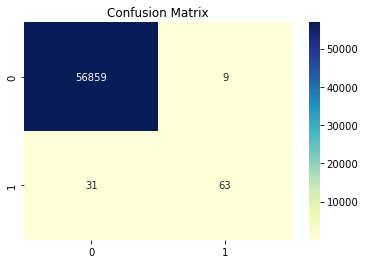

0.9992977774656788

In [26]:
predict(LogisticRegression(), X_train, X_test, y_train, y_test)

[15:08:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[[56867     1]
 [   16    78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.99      0.83      0.90        94

    accuracy                           1.00     56962
   macro avg       0.99      0.91      0.95     56962
weighted avg       1.00      1.00      1.00     56962

Precision : 0.9873417721518988
Recall : 0.8297872340425532
roc_score 0.9148848247303573


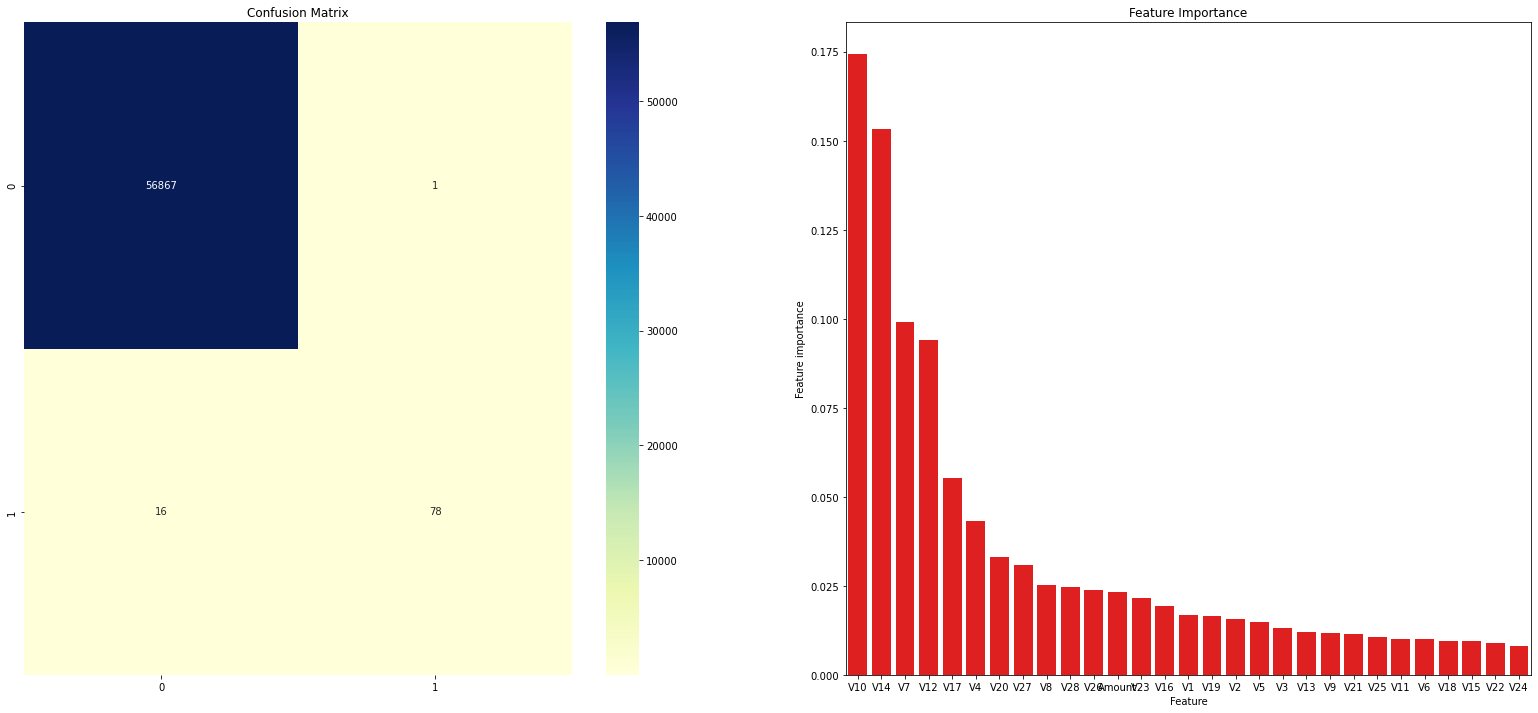

0.9997015554229135

In [27]:
predict2(xgb.XGBClassifier(silent=True,max_depth=2,tree_method = 'gpu_hist',predictor='gpu_predictor',eval_metric='auc'),X_train,X_test, y_train, y_test)

[[56867     1]
 [   19    75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.99      0.80      0.88        94

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Precision : 0.9868421052631579
Recall : 0.7978723404255319
roc_score 0.8989273779218466


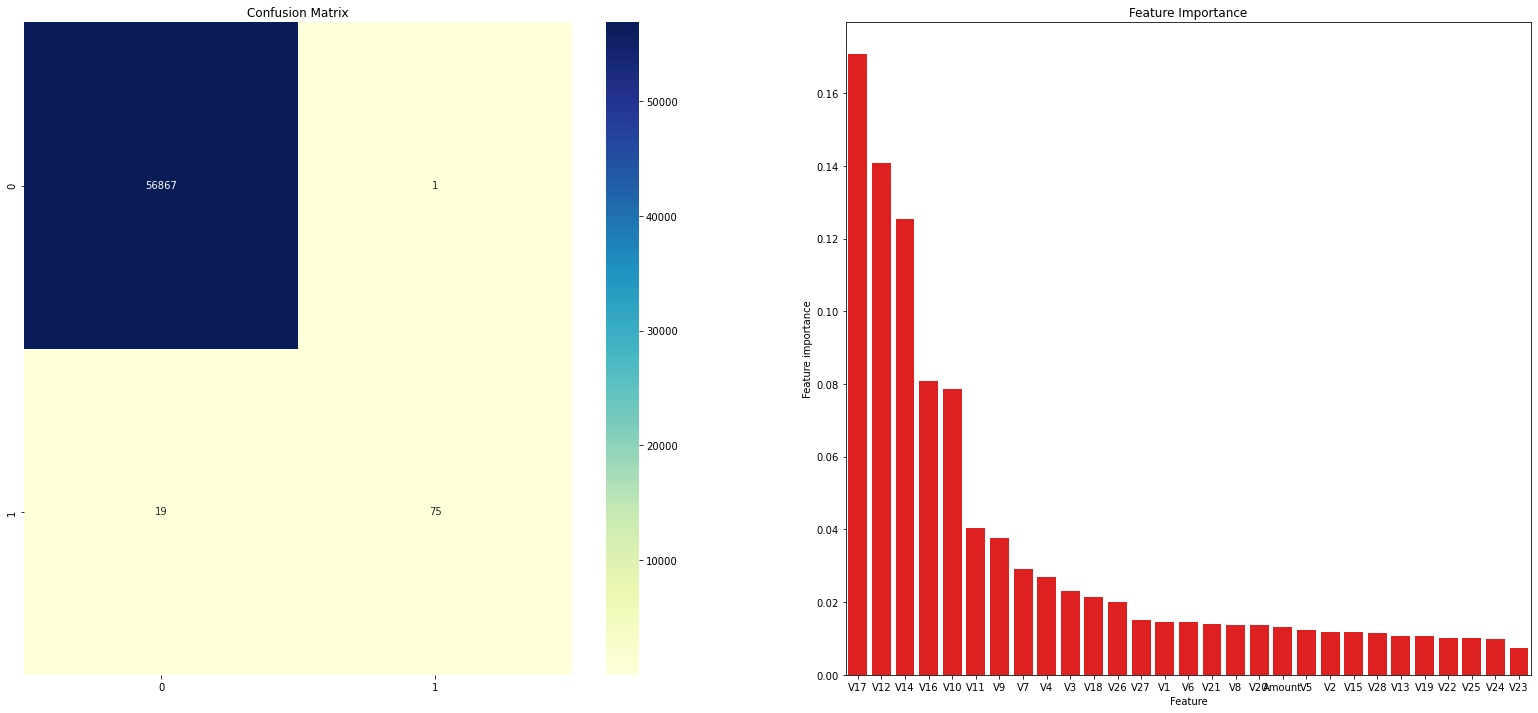

0.9996488887328394

In [28]:
predict2(RandomForestClassifier(n_estimators=100,n_jobs=4,verbose=False),X_train,X_test, y_train, y_test)

[[56854    14]
 [   23    71]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.84      0.76      0.79        94

    accuracy                           1.00     56962
   macro avg       0.92      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Precision : 0.8352941176470589
Recall : 0.7553191489361702
roc_score 0.8775364823952144


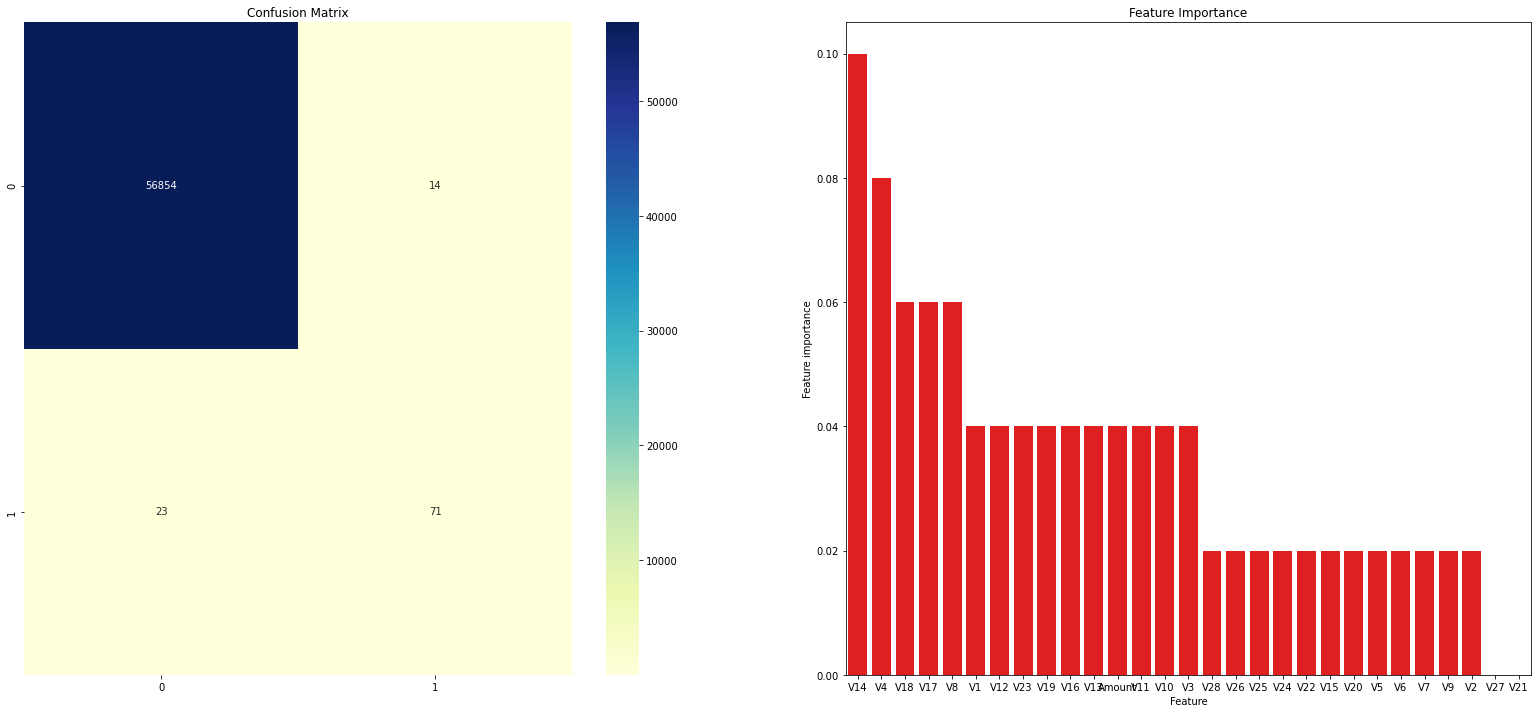

0.9993504441557529

In [29]:
predict2(AdaBoostClassifier(random_state=42,
                        algorithm='SAMME.R',
                         learning_rate=0.8,),X_train,X_test, y_train, y_test)

[[56839    29]
 [   30    64]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.69      0.68      0.68        94

    accuracy                           1.00     56962
   macro avg       0.84      0.84      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Precision : 0.6881720430107527
Recall : 0.6808510638297872
roc_score 0.8401705554782333


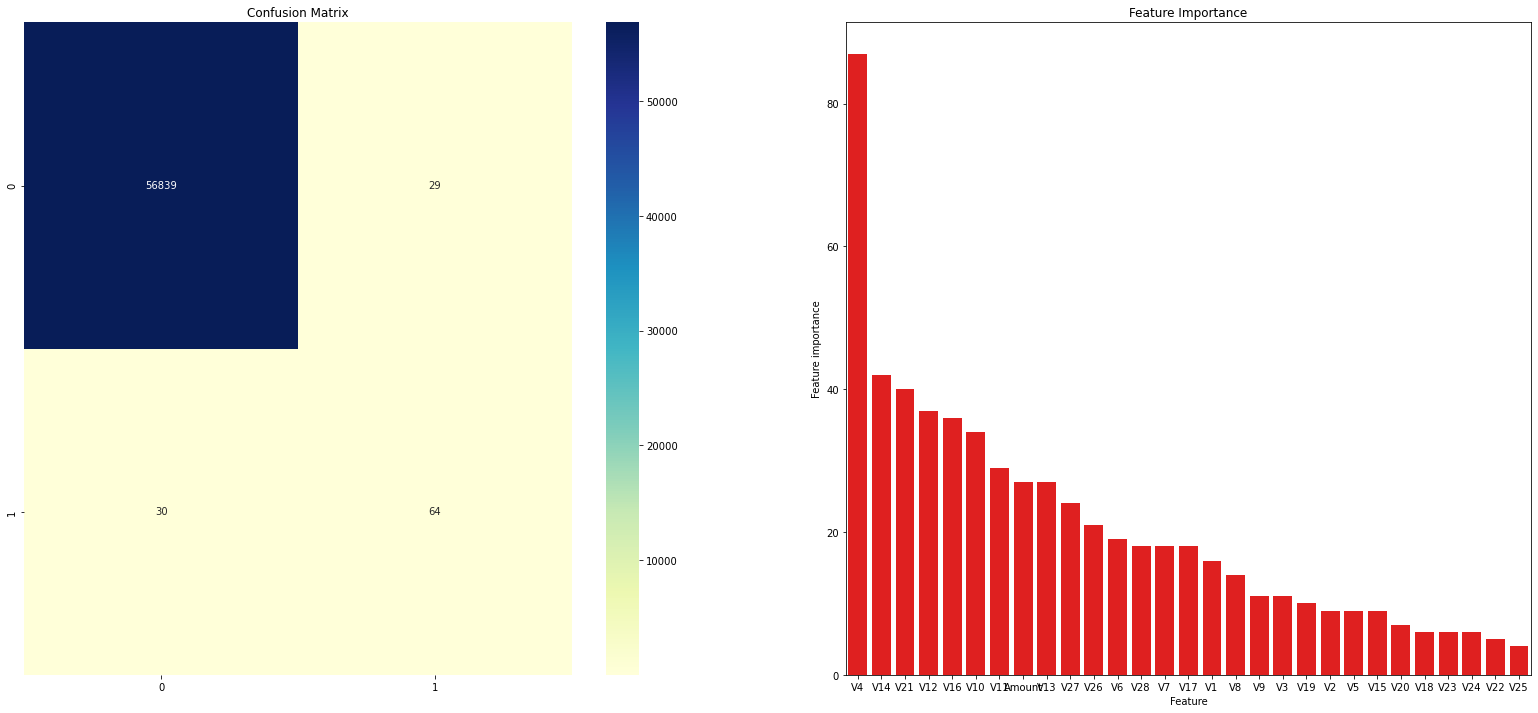

0.9989642217618764

In [30]:
predict2(lgb.LGBMClassifier(
    objective='binary',
        metric = 'auc',
          learning_rate= 0.05,
          num_leaves =  7,max_depth=4,min_child_samples= 100,  
          max_bin=100,device= 'gpu'),X_train,X_test, y_train, y_test)

[[56867     1]
 [   21    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.99      0.78      0.87        94

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

roc_score 0.8882890800495062
Precision : 0.9864864864864865
Recall : 0.776595744680851


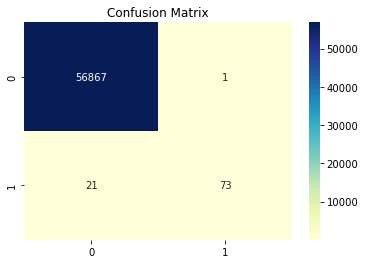

0.9996137776061234

In [31]:
predict(Knn(n_neighbors=5),X_train,X_test,y_train,y_test)

[[55580  1288]
 [   16    78]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56868
           1       0.06      0.83      0.11        94

    accuracy                           0.98     56962
   macro avg       0.53      0.90      0.55     56962
weighted avg       1.00      0.98      0.99     56962

roc_score 0.90356914631719
Precision : 0.05710102489019034
Recall : 0.8297872340425532


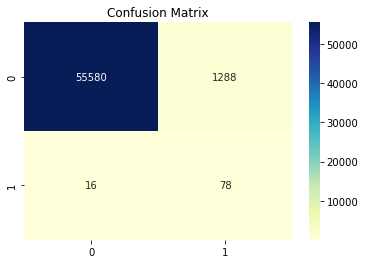

0.9771075453811313

In [32]:
predict(GaussianNB(),X_train,X_test,y_train,y_test )

now le'ts try same after sampling


In [33]:
smt = SMOTE(random_state=42)

X_smote,Y_smote = smt.fit_resample(X_train,y_train)

[[55366  1502]
 [    9    85]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56868
           1       0.05      0.90      0.10        94

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.99     56962

roc_score 0.9389216386136465
Precision : 0.05356017643352237
Recall : 0.9042553191489362


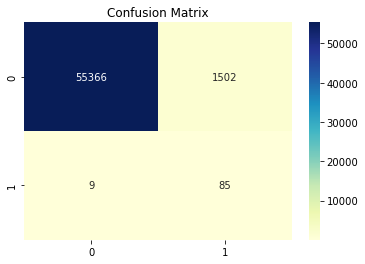

0.9734735437660195

In [34]:
predict(LogisticRegression(), X_smote, X_test, Y_smote, y_test)

[15:14:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[[56322   546]
 [   11    83]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56868
           1       0.13      0.88      0.23        94

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962

Precision : 0.13195548489666137
Recall : 0.8829787234042553
roc_score 0.9366887708601778


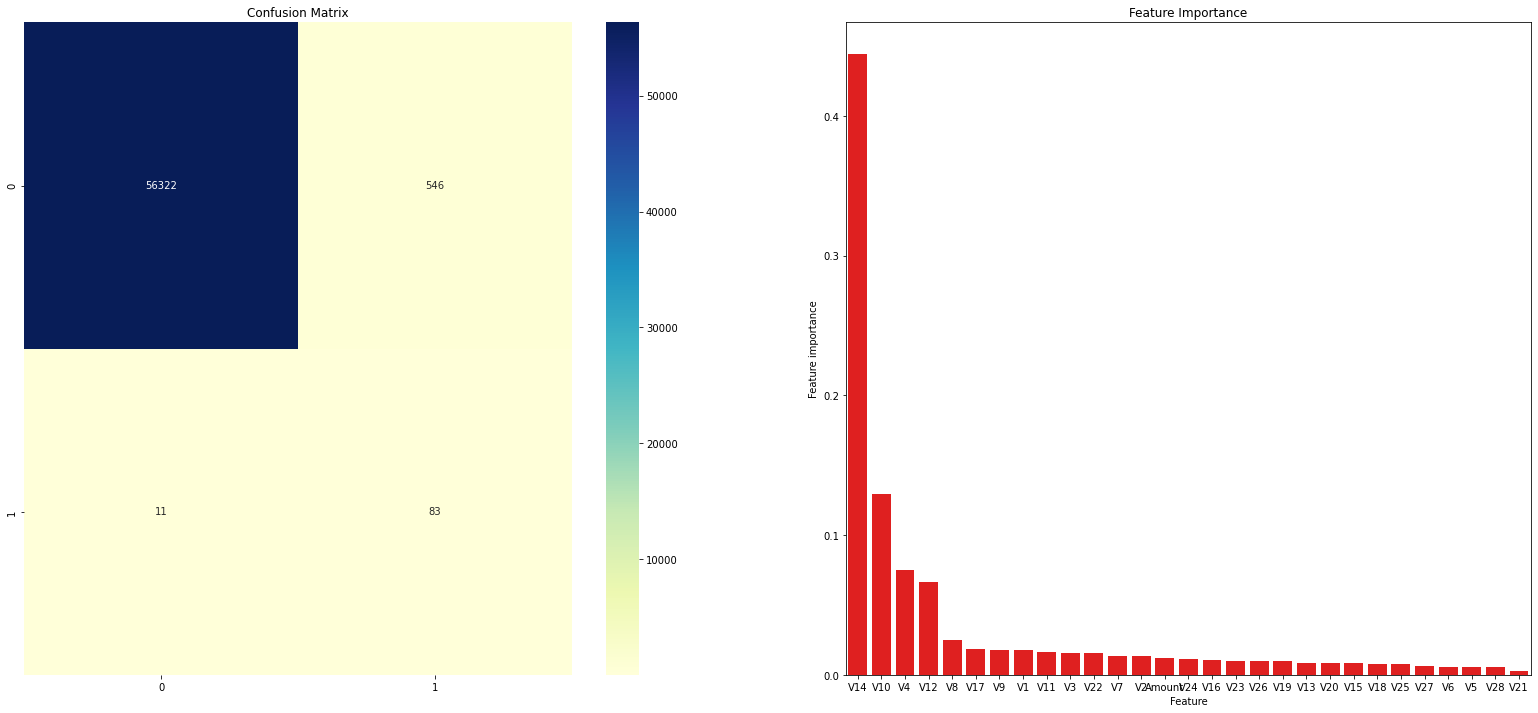

0.9902215512095783

In [35]:
predict2(xgb.XGBClassifier(silent=True,max_depth=2,tree_method = 'gpu_hist',predictor='gpu_predictor',eval_metric='auc'),X_smote,X_test, Y_smote, y_test)

[[56857    11]
 [   17    77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.88      0.82      0.85        94

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Precision : 0.875
Recall : 0.8191489361702128
roc_score 0.9094777528849938


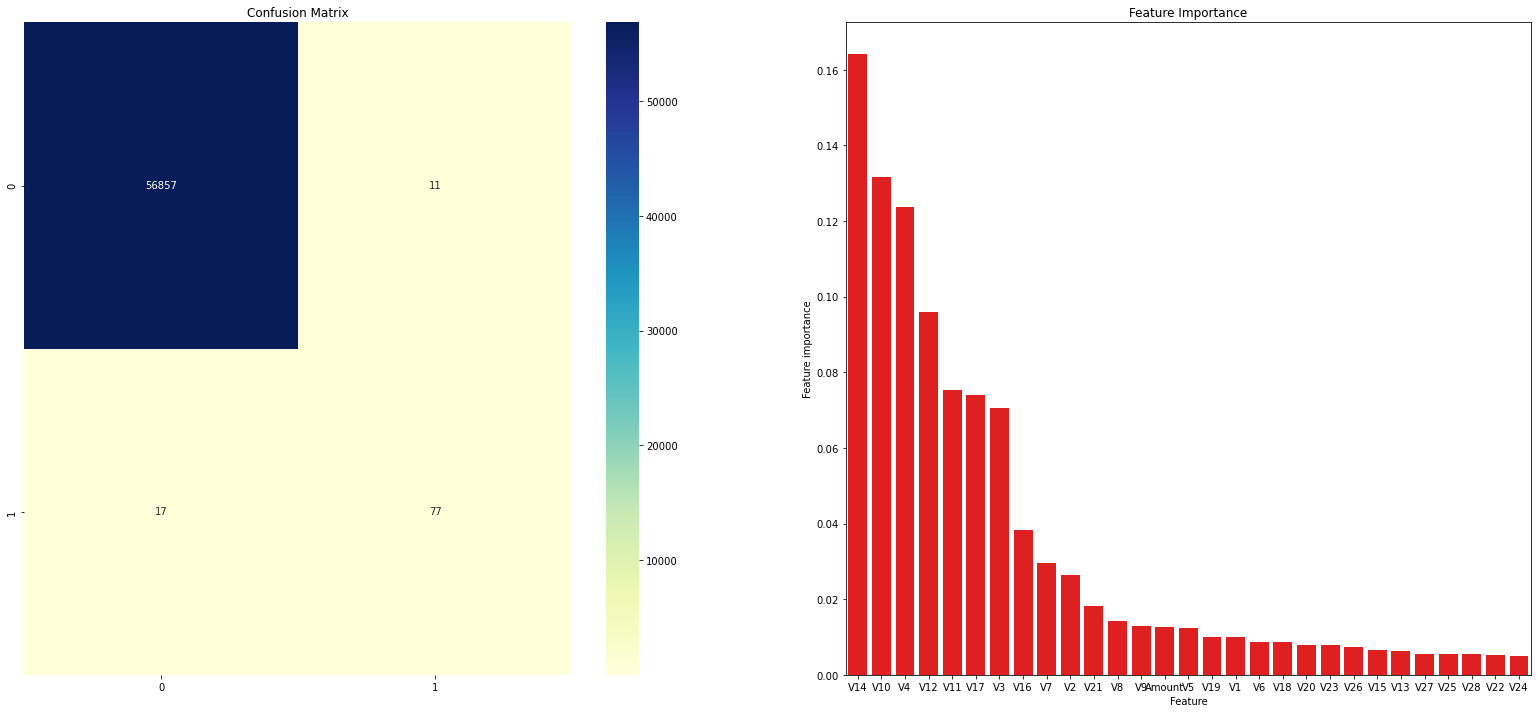

0.9995084442259752

In [36]:
predict2(RandomForestClassifier(n_estimators=100,n_jobs=4,verbose=False),X_smote,X_test, Y_smote, y_test)

[[55621  1247]
 [   11    83]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56868
           1       0.06      0.88      0.12        94

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Precision : 0.062406015037593986
Recall : 0.8829787234042553
roc_score 0.9305253749257332


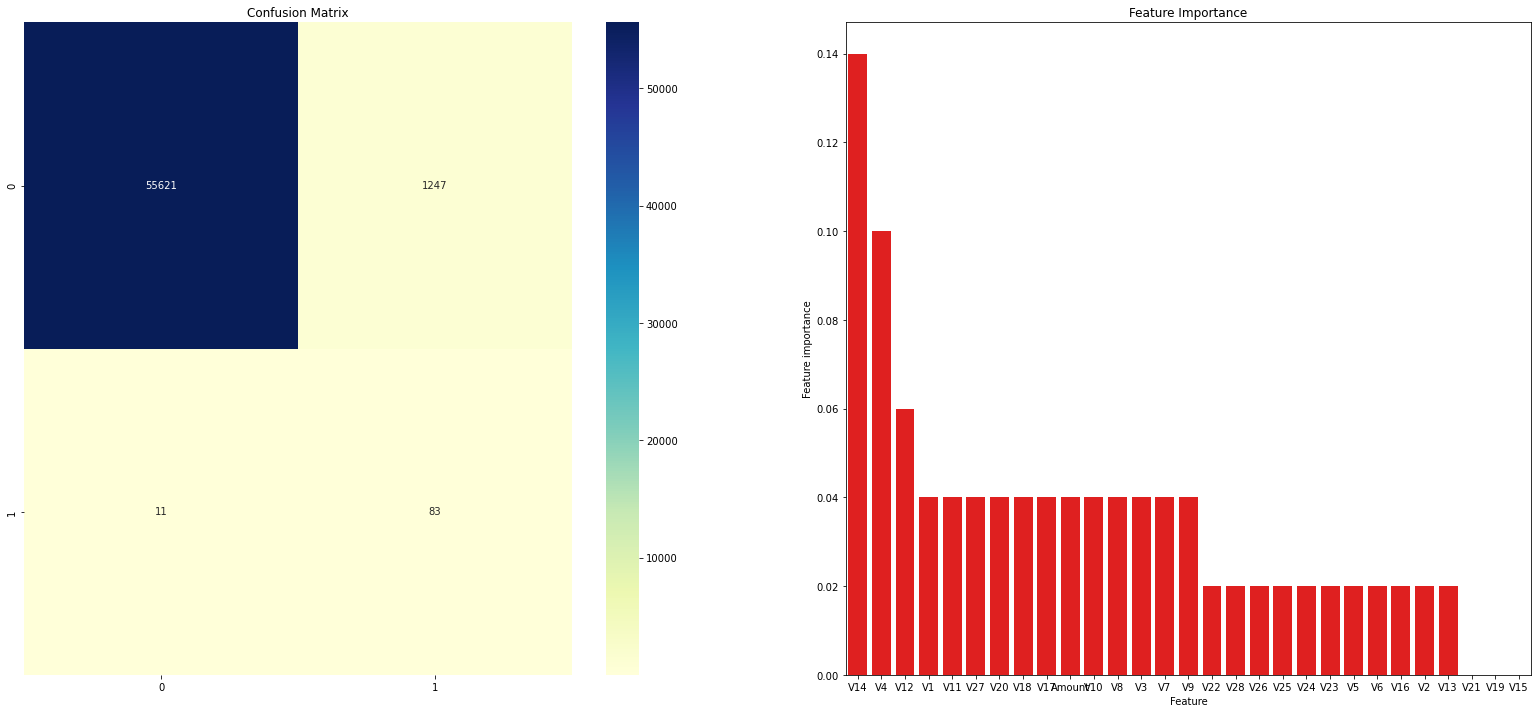

0.9779151012956006

In [37]:
predict2(AdaBoostClassifier(random_state=42,
                        algorithm='SAMME.R',
                         learning_rate=0.8,),X_smote,X_test, Y_smote, y_test)

[[55858  1010]
 [    9    85]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56868
           1       0.08      0.90      0.14        94

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962

Precision : 0.0776255707762557
Recall : 0.9042553191489362
roc_score 0.943247445745953


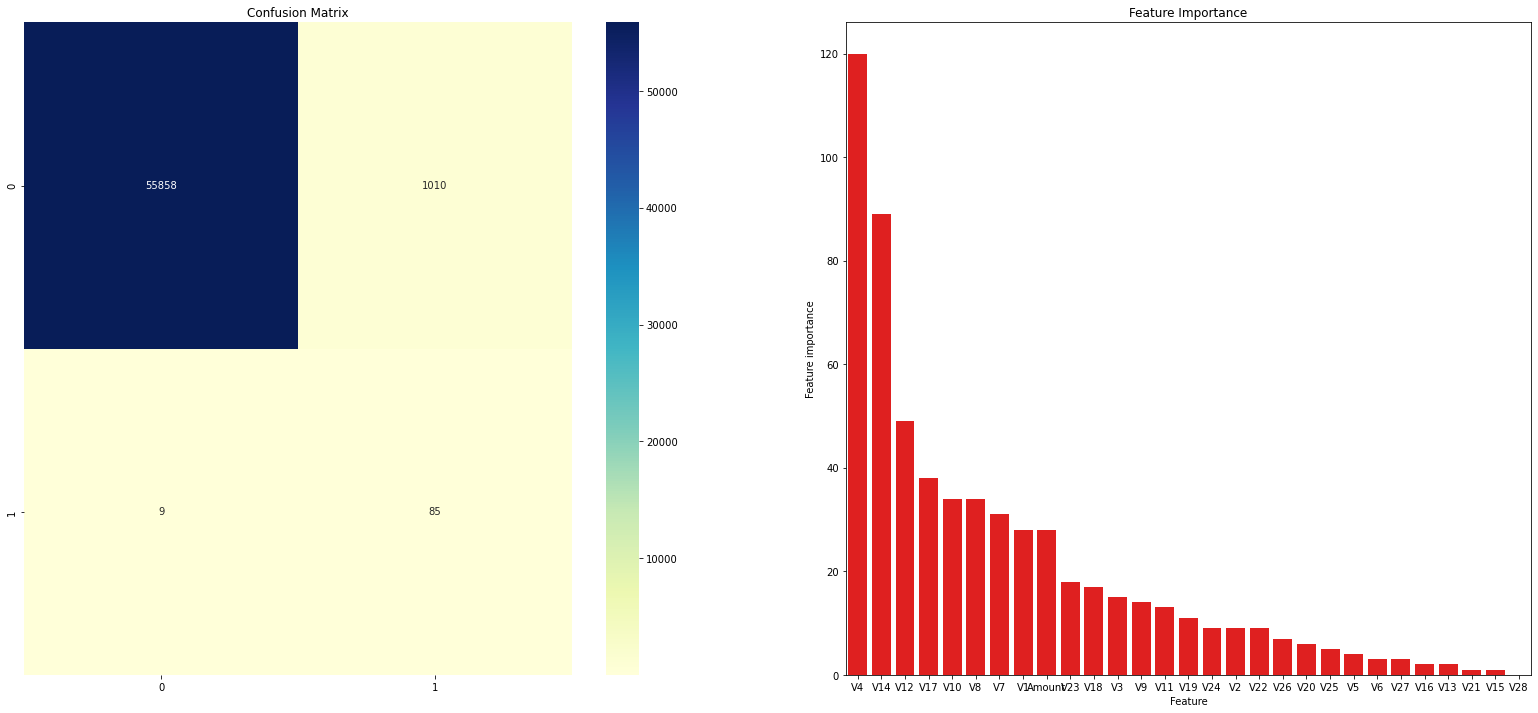

0.9821108809381693

In [38]:
predict2(lgb.LGBMClassifier(
    objective='binary',
        metric = 'auc',
          learning_rate= 0.05,
          num_leaves =  7,max_depth=4,min_child_samples= 100,  
          max_bin=100,device= 'gpu'),X_smote,X_test, Y_smote, y_test)

In [39]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680


In [40]:
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
Fraud = df[df['Class']==1]
Valid = df[df['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

In [42]:
outlier_fraction

0.0017304750013189597

In [44]:
n_outliers = len(Fraud)

In [45]:
state = np.random.RandomState(42)

In [46]:
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

In [47]:
model = IsolationForest(contamination= outlier_fraction, random_state = 42, verbose=1)
model.fit(X)

y_pred = model.predict(X)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished


In [48]:
y_pred[y_pred == 1] = 0  # for reshaping the prediction values
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()

In [49]:
print("erros",n_errors)

erros 707


In [50]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.28      0.28      0.28       492

    accuracy                           1.00    284807
   macro avg       0.64      0.64      0.64    284807
weighted avg       1.00      1.00      1.00    284807



looks like ML models are quite good for these but accuracy does decrease when you use balanced data now let's try some neural networks on these

In [51]:
#let's try with imbalanced data for now
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

from keras.layers.recurrent import LSTM

In [52]:
n_inputs = len(X_train.columns)

In [53]:
model = Sequential()

# First Hidden Layer 
model.add(Dense(50, input_dim = n_inputs, activation = 'relu', kernel_initializer = 'he_uniform'))

# Define output layer
model.add(Dense(1, activation = 'sigmoid'))


In [54]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam'
)

In [55]:
model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
7121/7121 [==============================] - 13s 2ms/step - loss: 0.0099
Epoch 2/20
7121/7121 [==============================] - 12s 2ms/step - loss: 0.0032
Epoch 3/20
7121/7121 [==============================] - 12s 2ms/step - loss: 0.0028
Epoch 4/20
7121/7121 [==============================] - 12s 2ms/step - loss: 0.0027
Epoch 5/20
7121/7121 [==============================] - 12s 2ms/step - loss: 0.0024
Epoch 6/20
7121/7121 [==============================] - 12s 2ms/step - loss: 0.0024
Epoch 7/20
7121/7121 [==============================] - 12s 2ms/step - loss: 0.0023
Epoch 8/20
7121/7121 [==============================] - 12s 2ms/step - loss: 0.0022
Epoch 9/20
7121/7121 [==============================] - 12s 2ms/step - loss: 0.0021
Epoch 10/20
7121/7121 [==============================] - 12s 2ms/step - loss: 0.0020
Epoch 11/20
7121/7121 [==============================] - 12s 2ms/step - loss: 0.0019
Epoch 12/20
7121/7121 [==============================] - 12s 2ms/step - lo

In [56]:
y_pred_nn = model.predict_classes(X_test)

In [57]:
print("Accuracy Neural Net:",metrics.accuracy_score(y_test, y_pred_nn))
print("Precision Neural Net:",metrics.precision_score(y_test, y_pred_nn))
print("Recall Neural Net:",metrics.recall_score(y_test, y_pred_nn))
print("F1 Score Neural Net:",metrics.f1_score(y_test, y_pred_nn))

Accuracy Neural Net: 0.9996137776061234
Precision Neural Net: 0.9390243902439024
Recall Neural Net: 0.8191489361702128
F1 Score Neural Net: 0.875


In [58]:
#AUC

y_pred_nn_proba = model.predict(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred_nn_proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC Neural Net: ', auc_keras)

AUC Neural Net:  0.9631750795795864


In [59]:
#not bad now lets try with smote balanced one
model.fit(X_smote, Y_smote, epochs = 20)

Epoch 1/20
14216/14216 [==============================] - 24s 2ms/step - loss: 0.0083
Epoch 2/20
14216/14216 [==============================] - 24s 2ms/step - loss: 0.0035
Epoch 3/20
14216/14216 [==============================] - 25s 2ms/step - loss: 0.0024
Epoch 4/20
14216/14216 [==============================] - 25s 2ms/step - loss: 0.0018
Epoch 5/20
14216/14216 [==============================] - 24s 2ms/step - loss: 0.0016
Epoch 6/20
14216/14216 [==============================] - 24s 2ms/step - loss: 0.0014
Epoch 7/20
14216/14216 [==============================] - 42s 3ms/step - loss: 0.0013
Epoch 8/20
14216/14216 [==============================] - 35s 2ms/step - loss: 0.0012
Epoch 9/20
14216/14216 [==============================] - 36s 3ms/step - loss: 0.0011
Epoch 10/20
14216/14216 [==============================] - 39s 3ms/step - loss: 9.7902e-04
Epoch 11/20
14216/14216 [==============================] - 41s 3ms/step - loss: 9.2961e-04
Epoch 12/20
14216/14216 [===================

In [60]:
y_pred_nn = model.predict_classes(X_test)

In [61]:
print("Accuracy Neural Net:",metrics.accuracy_score(y_test, y_pred_nn))
print("Precision Neural Net:",metrics.precision_score(y_test, y_pred_nn))
print("Recall Neural Net:",metrics.recall_score(y_test, y_pred_nn))
print("F1 Score Neural Net:",metrics.f1_score(y_test, y_pred_nn))

Accuracy Neural Net: 0.9991222218320986
Precision Neural Net: 0.7
Recall Neural Net: 0.8191489361702128
F1 Score Neural Net: 0.7549019607843137


In [62]:
#AUC

y_pred_nn_proba = model.predict(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred_nn_proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC Neural Net: ', auc_keras)


AUC Neural Net:  0.9615417712388076


In [63]:
#let's  try multi layer perceptron as well
from sklearn.neural_network import MLPClassifier

[[56860     8]
 [   18    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.90      0.81      0.85        94

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

roc_score 0.9041849808215816
Precision : 0.9047619047619048
Recall : 0.8085106382978723


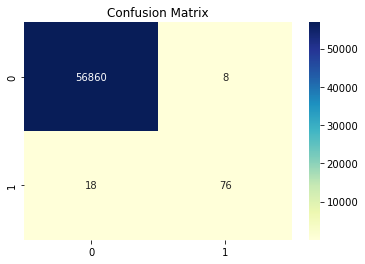

0.9995435553526912

In [64]:
predict(MLPClassifier(solver='lbfgs', hidden_layer_sizes=(100,100), random_state=2),X_train,X_test,y_train,y_test)

[[56845    23]
 [   20    74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.76      0.79      0.77        94

    accuracy                           1.00     56962
   macro avg       0.88      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962

roc_score 0.8934147985854514
Precision : 0.7628865979381443
Recall : 0.7872340425531915


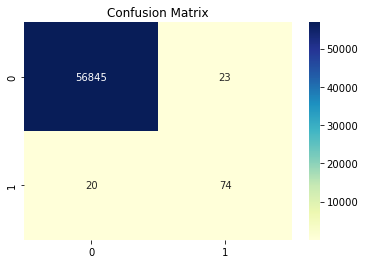

0.9992451107756047

In [65]:
predict(MLPClassifier(solver='lbfgs', hidden_layer_sizes=(100,100), random_state=2),X_smote,X_test,Y_smote,y_test)

[[56748   120]
 [   12    82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.41      0.87      0.55        94

    accuracy                           1.00     56962
   macro avg       0.70      0.94      0.78     56962
weighted avg       1.00      1.00      1.00     56962

roc_score 0.9351151378556388
Precision : 0.40594059405940597
Recall : 0.8723404255319149


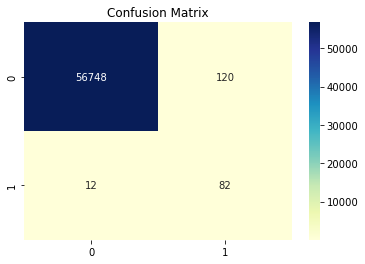

0.9976826656367402

In [66]:
predict(Knn(n_neighbors=5),X_smote,X_test,Y_smote,y_test)

[[55399  1469]
 [   14    80]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56868
           1       0.05      0.85      0.10        94

    accuracy                           0.97     56962
   macro avg       0.53      0.91      0.54     56962
weighted avg       1.00      0.97      0.99     56962

roc_score 0.9126160395331331
Precision : 0.051646223369916075
Recall : 0.851063829787234


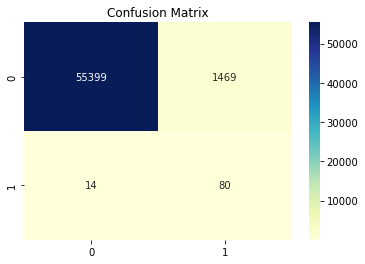

0.9739650995400443

In [67]:
predict(GaussianNB(),X_smote,X_test,Y_smote,y_test )

In [68]:
#now let's try with some dense networks
model = Sequential()
model.add(Dense(32, input_shape=(29,), activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(16, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(8, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(4, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(1, activation='sigmoid'))

In [69]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [70]:
history = model.fit(X_train, y_train, epochs = 10,  validation_split = 0.15, verbose = 1,
                    )
history_dict = history.history

Epoch 1/10
6053/6053 [==============================] - 33s 5ms/step - loss: 0.0229 - accuracy: 0.9983 - val_loss: 0.0041 - val_accuracy: 0.9987
Epoch 2/10
6053/6053 [==============================] - 33s 5ms/step - loss: 0.0070 - accuracy: 0.9987 - val_loss: 0.0037 - val_accuracy: 0.9987
Epoch 3/10
6053/6053 [==============================] - 33s 5ms/step - loss: 0.0059 - accuracy: 0.9988 - val_loss: 0.0040 - val_accuracy: 0.9987
Epoch 4/10
6053/6053 [==============================] - 35s 6ms/step - loss: 0.0051 - accuracy: 0.9988 - val_loss: 0.0037 - val_accuracy: 0.9989
Epoch 5/10
6053/6053 [==============================] - 34s 6ms/step - loss: 0.0050 - accuracy: 0.9990 - val_loss: 0.0031 - val_accuracy: 0.9992
Epoch 6/10
6053/6053 [==============================] - 34s 6ms/step - loss: 0.0044 - accuracy: 0.9990 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 7/10
6053/6053 [==============================] - 34s 6ms/step - loss: 0.0046 - accuracy: 0.9990 - val_loss: 0.0038 - val_ac

Text(0.5, 0, 'Epochs')

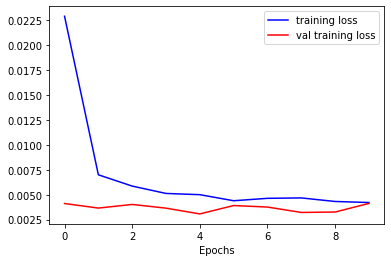

In [71]:
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

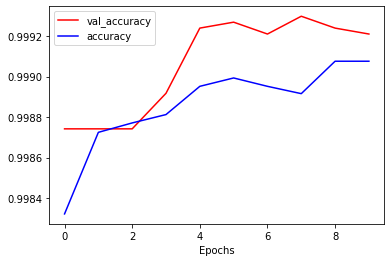

In [72]:
accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()
plt.xlabel("Epochs")

In [73]:
y_pred_nn = model.predict_classes(X_test)

In [74]:
#let's try same with balanced datasets as well


In [75]:
print("Accuracy Neural Net:",metrics.accuracy_score(y_test, y_pred_nn))
print("Precision Neural Net:",metrics.precision_score(y_test, y_pred_nn))
print("Recall Neural Net:",metrics.recall_score(y_test, y_pred_nn))
print("F1 Score Neural Net:",metrics.f1_score(y_test, y_pred_nn))

Accuracy Neural Net: 0.9994733330992591
Precision Neural Net: 0.9
Recall Neural Net: 0.7659574468085106
F1 Score Neural Net: 0.8275862068965516


In [76]:
#AUC

y_pred_nn_proba = model.predict(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred_nn_proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC Neural Net: ', auc_keras)

AUC Neural Net:  0.9682347623986267


Using auto encoders now

In [469]:
card_df= pd.read_csv("creditcard.csv", sep= ',')

In [432]:
normal_trans = card_df[card_df['Class'] == 0].sample(4000)
fraud_trans = card_df[card_df['Class'] == 1]

In [433]:
reduced_set = normal_trans.append(fraud_trans).reset_index(drop=True)

In [438]:
# Splitting the dataset into X and y features
y = reduced_set['Class']
X = reduced_set.drop(['Class','Time'], axis=1)

In [78]:
from sklearn.manifold import TSNE

In [332]:
normal

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
268440,163211.0,1.746566,0.028144,-1.011697,3.987188,0.514843,0.588447,0.191973,0.032246,-0.331347,...,0.083576,0.249898,-0.070653,0.474199,0.304630,0.165433,-0.056408,-0.037542,1.161741,0
232713,147276.0,2.329193,-1.272398,-0.809070,-1.650201,-1.048532,-0.290535,-1.209388,-0.193618,-1.261634,...,-0.157503,0.143248,0.247354,0.494887,-0.166736,-0.197558,0.033471,-0.038731,-0.223573,0
187786,127690.0,-0.047436,0.651687,1.540647,1.184102,0.132528,0.097981,0.775174,-0.126558,0.412653,...,-0.453339,-0.891165,0.154452,-0.099291,-0.868336,-1.032766,0.096383,-0.010102,0.068329,0
128651,78791.0,-2.354493,2.533377,0.189739,0.527671,-0.455120,0.837705,-0.968327,-3.380131,-0.377096,...,4.005386,-0.614985,0.490331,-0.039491,-0.133235,-0.275853,0.494779,0.226028,0.244673,0
169780,119858.0,-0.655512,0.394343,-0.060912,-0.801970,2.190651,1.430542,0.902905,0.469133,-0.855102,...,0.271454,0.879127,-0.044330,-0.529861,-0.285958,0.400677,0.121216,0.132134,0.103403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217374,140865.0,1.998107,-0.388187,-0.388483,0.345789,-0.419944,-0.003157,-0.651319,0.006770,1.093300,...,0.165960,0.725416,0.177967,0.690280,-0.223408,0.541638,-0.013877,-0.039061,-0.168378,0
142011,84550.0,1.245333,-0.533645,0.855398,-0.701462,-1.435500,-0.882970,-0.745889,0.112115,2.208322,...,-0.042032,0.004268,-0.005655,0.334066,0.414489,-0.677703,0.076951,0.029760,-0.293440,0
68556,53042.0,1.204337,0.244574,0.630962,0.547596,-0.475065,-0.772896,-0.001860,-0.101176,-0.307753,...,-0.186598,-0.551233,0.143463,0.544641,0.177947,0.062767,-0.029095,0.011949,-0.289387,0
204517,135318.0,2.011245,-0.821621,0.121422,-1.387531,-1.384975,-0.773923,-1.026518,-0.088365,2.428136,...,0.264545,1.143496,0.157798,0.138612,-0.280430,-0.187653,0.081304,-0.025174,-0.188779,0


Let's visualize the data using T-Sne

In [338]:
def dimensionality_plot(X, y):
    sns.set(style='whitegrid', palette='muted')
    # Initializing TSNE object with 2 principal components
    tsne = TSNE(n_components=2, random_state = 42)
    
    # Fitting the data
    X_trans = tsne.fit_transform(X)
    plt.scatter(X_trans[np.where(y == 0), 0], 
                 X_trans[np.where(y==0), 1], marker='o',
                 color='g', alpha=0.8, label='Normal')
    plt.scatter(X_trans[np.where(y == 1), 0], 
                 X_trans[np.where(y==1), 1], marker='o',
                 color='b', alpha=0.8, label='Fraud')
    plt.legend()
    plt.show()
    
       

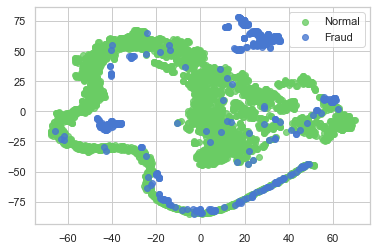

In [439]:
dimensionality_plot(X, y)

as we can see it is hard to separate data just by using T-sne

In [440]:
scaler = RobustScaler().fit_transform(X)

# Scaled data
X_scaled_normal = scaler[y == 0]
X_scaled_fraud = scaler[y == 1]

In [404]:
autoencoder= tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(X_normal.shape[1],),

## encoding part
       tf.keras.layers. Dense(100, activation='relu',activity_regularizer=regularizers.l1(1e-5)),
    
    tf.keras.layers. Dense(50, activation='relu'),
    tf.keras.layers. Dense(25, activation='relu'),
    tf.keras.layers. Dense(12, activation='relu'),
    tf.keras.layers. Dense(6, activation='relu'),
  
#deconding part
    tf.keras.layers. Dense(12, activation='relu'),
    tf.keras.layers. Dense(25, activation='relu'),
    tf.keras.layers. Dense(50, activation='relu'),
    tf.keras.layers. Dense(100, activation='relu'),
    tf.keras.layers. Dense(X_normal.shape[1], activation='relu'),
])

In [405]:
autoencoder.compile(optimizer='adam', loss= 'mse', metrics= ['accuracy'])

In [406]:
autoencoder.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_270 (Dense)            (None, 100)               3000      
_________________________________________________________________
dense_271 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_272 (Dense)            (None, 25)                1275      
_________________________________________________________________
dense_273 (Dense)            (None, 12)                312       
_________________________________________________________________
dense_274 (Dense)            (None, 6)                 78        
_________________________________________________________________
dense_275 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_276 (Dense)            (None, 25)              

In [407]:
#let's define early stopping so that model prevents overfitting
early= tf.keras.callbacks.EarlyStopping(monitor= 'val_loss',
                                       patience= 10,
                                       mode= 'min',
                                       restore_best_weights= True)

In [441]:
history = autoencoder.fit(X_scaled_normal, X_scaled_normal,epochs= 50, batch_size=32,validation_split=0.2, verbose= 1, callbacks=[early])

Epoch 1/50
100/100 [==============================] - 1s 9ms/step - loss: 0.8874 - accuracy: 0.5325 - val_loss: 0.6966 - val_accuracy: 0.5550
Epoch 2/50
100/100 [==============================] - 1s 8ms/step - loss: 0.8692 - accuracy: 0.5516 - val_loss: 0.6919 - val_accuracy: 0.5863
Epoch 3/50
100/100 [==============================] - 1s 8ms/step - loss: 0.8583 - accuracy: 0.5663 - val_loss: 0.6858 - val_accuracy: 0.5688
Epoch 4/50
100/100 [==============================] - 1s 8ms/step - loss: 0.8524 - accuracy: 0.5781 - val_loss: 0.6852 - val_accuracy: 0.5900
Epoch 5/50
100/100 [==============================] - 1s 7ms/step - loss: 0.8495 - accuracy: 0.5884 - val_loss: 0.6836 - val_accuracy: 0.5900
Epoch 6/50
100/100 [==============================] - 1s 8ms/step - loss: 0.8523 - accuracy: 0.5794 - val_loss: 0.6871 - val_accuracy: 0.5962
Epoch 7/50
100/100 [==============================] - 1s 8ms/step - loss: 0.8468 - accuracy: 0.5894 - val_loss: 0.6860 - val_accuracy: 0.5913
Epoch 

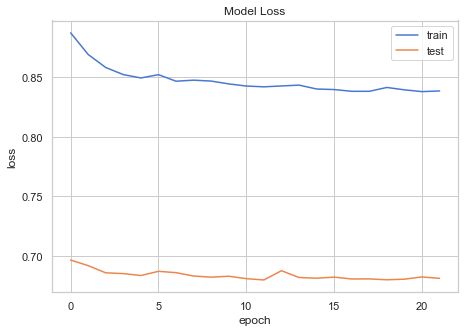

In [442]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');


plt.show()

In [443]:
#now let's obtain latent representation of the input
hidden_represent= Sequential()
hidden_represent.add(autoencoder.layers[0])
hidden_represent.add(autoencoder.layers[1])
hidden_represent.add(autoencoder.layers[2])
hidden_represent.add(autoencoder.layers[3])
hidden_represent.add(autoencoder.layers[4])





In [444]:
norm_hid_rep = hidden_represent.predict(X_scaled_normal)
fraud_hid_rep = hidden_represent.predict(X_scaled_fraud)

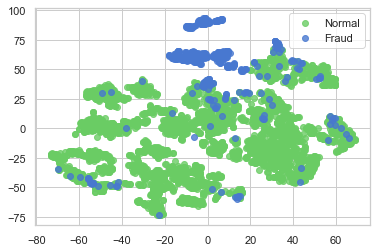

In [446]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f,axis =0)
dimensionality_plot(rep_x, rep_y)

this is better given we trained autoencoder using nonfraud datasets only

In [418]:
#now let's train same model using whole dataset

In [454]:
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [451]:
X_train,X_test= train_test_split(df1,test_size= 0.2, random_state= 42)

In [455]:
X_train = X_train[X_train.Class==0]
X_train = X_train.drop(['Class','Time'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class','Time'], axis=1)

X_train = X_train.values
X_test = X_test.values

AttributeError: 'numpy.ndarray' object has no attribute 'Class'

In [456]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (227451, 29)
Shape of X_test: (56962, 29)


In [457]:
history = autoencoder.fit(X_train, X_train,epochs= 50, batch_size=32,validation_split=0.2, verbose= 1,callbacks=[early])

Epoch 1/50
5687/5687 [==============================] - 39s 7ms/step - loss: 3.2486 - accuracy: 0.9349 - val_loss: 8.1883 - val_accuracy: 0.9384
Epoch 2/50
5687/5687 [==============================] - 41s 7ms/step - loss: 1.5144 - accuracy: 0.9425 - val_loss: 0.8023 - val_accuracy: 0.9408
Epoch 3/50
5687/5687 [==============================] - 41s 7ms/step - loss: 2.7227 - accuracy: 0.9365 - val_loss: 0.8587 - val_accuracy: 0.9404
Epoch 4/50
5687/5687 [==============================] - 42s 7ms/step - loss: 2.0981 - accuracy: 0.9388 - val_loss: 0.8256 - val_accuracy: 0.9430
Epoch 5/50
5687/5687 [==============================] - 27s 5ms/step - loss: 2.9549 - accuracy: 0.9398 - val_loss: 0.8747 - val_accuracy: 0.9363
Epoch 6/50
5687/5687 [==============================] - 22s 4ms/step - loss: 5.5064 - accuracy: 0.9371 - val_loss: 0.7742 - val_accuracy: 0.9458
Epoch 7/50
5687/5687 [==============================] - 21s 4ms/step - loss: 1.7058 - accuracy: 0.9375 - val_loss: 0.8412 - val_ac

it stopped since after epochs 24 it did not  decrease by much

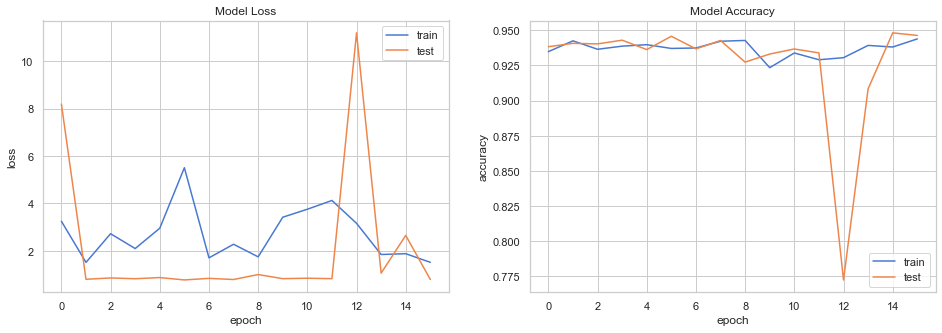

In [458]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')


plt.show()

In [459]:
prediction = autoencoder.predict(X_test)

In [460]:
mse = np.mean(np.power(X_test - prediction, 2), axis=1)
error = pd.DataFrame({'reconstruction_error': mse, 'actual_class': y_test})

In [461]:
without_fraud = error[error.actual_class==0]
with_fraud = error[error.actual_class==1]

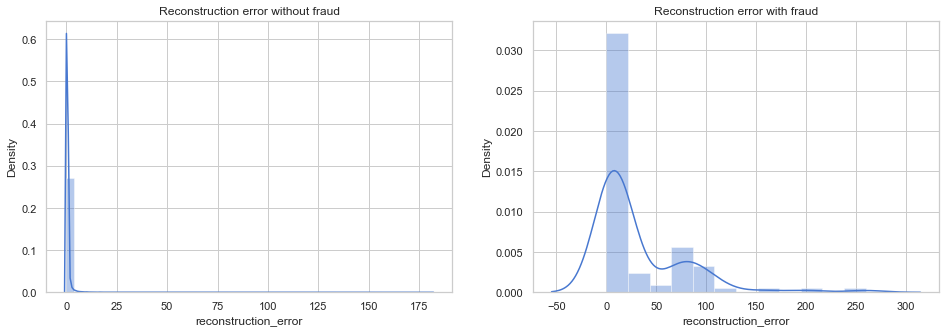

In [462]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.distplot(without_fraud["reconstruction_error"])
plt.title("Reconstruction error without fraud")

plt.subplot(1,2,2)
sns.distplot(with_fraud["reconstruction_error"])
plt.title("Reconstruction error with fraud")

plt.show()

In [467]:
mse = np.mean(np.power(X_test -prediction, 2), axis=1)

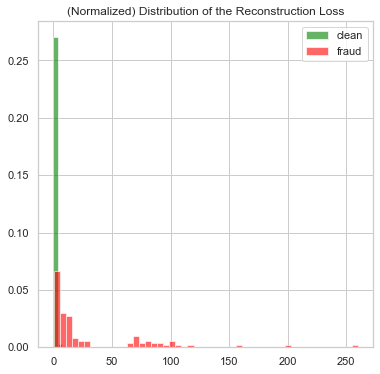

In [468]:
clean = mse[y_test==0]
fraud = mse[y_test==1]

fig, ax = plt.subplots(figsize=(6,6))

ax.hist(clean, bins=50, density=True, label="clean", alpha=.6, color="green")
ax.hist(fraud, bins=50, density=True, label="fraud", alpha=.6, color="red")

plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.legend()
plt.show()

In [463]:
y_pred = [1 if e > 3 else 0 for e in error.reconstruction_error.values]
print('Confusion Matrix\n' + str(confusion_matrix(y_test, y_pred)))

Confusion Matrix
[[55524  1340]
 [   20    78]]


looks like 20 were not identified
